## Beschreibung der Aufgabe

In dieser Aufgabe implementieren Sie ein Programm, das lernt, Punkte in $\mathbb{R}^3$ zu klassifizieren.

### Aufgabe 1: Einlesen der Trainingsdaten

Verwenden Sie pandas, um den Datensatz `train.csv` in einen DataFrame `df` zu laden. Wenn Sie `df.head()` ausführen, erhalten Sie:

```
 	  x1 	x2 	x3 	y
0 	2.351230 	2.902232 	2.457985 	0.0
1 	3.076945 	2.834429 	1.834440 	0.0
2 	3.116672 	3.542658 	1.668031 	0.0
3 	2.383648 	2.672314 	1.670679 	0.0
4 	2.171093 	1.647107 	0.780299 	0.0
```

Jede Zeile stellt einen Punkt dar. Die letzte Spalte `y` ist eine Ganzzahl (0 oder 1), welche die Klasse repräsentiert. Alle anderen Spalten beschreiben die Koordinate des Punktes.

Anschliessend erstellen Sie zwei DataFrames `X` und `y`. Hierbei soll `y` nur die Labels enthalten und `X` alle anderen Spalten. Soweit ist alles bereits im Code vorhanden.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('train.csv')

X = df.drop(['y'], axis=1)
y = df['y']

df.head()

,x1,x2,x3,y
0,2.351230,2.902232,2.457985,0.0
1,3.076945,2.834429,1.834440,0.0
2,3.116672,3.542658,1.668031,0.0
3,2.383648,2.672314,1.670679,0.0
4,2.171093,1.647107,0.780299,0.0


Text(0.5, 0, 'x3')

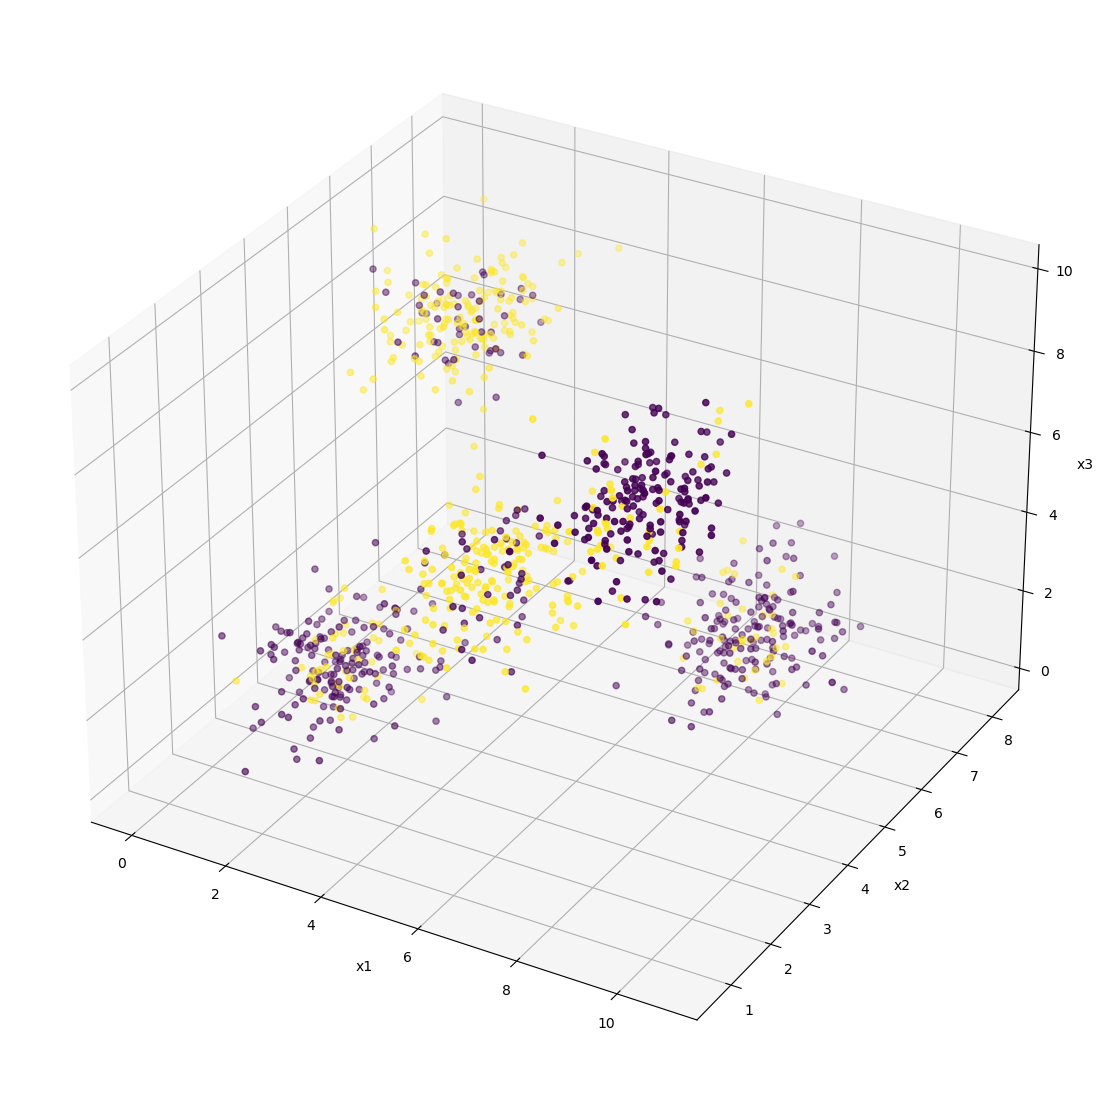

In [2]:
fig = plt.figure(figsize=(14,14))
ax = fig.add_subplot(projection='3d')
ax.scatter(X['x1'], X['x2'], X['x3'], c=y)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3')

### Aufgabe 2: Datensatz aufteilen

Teilen Sie nun `(X, y)` mithilfe der Funktion `train_test_split` von Scikit in einen Trainingsdatensatz `(X_train, y_train)` und einen Testdatensatz `(X_test, y_test)` auf. Anhand dieser Daten werden Sie in den kommenden Schritten Ihr Modell trainieren bzw. validieren. Nutzen Sie 80% der Punkte in `(X, y)` zur Erzeugung der Trainingsdaten und 20% für die Testdaten. 

Bitte ändern Sie $\textcolor{red}{NICHT}$ den Aufruf der Funktion `np.random.seed` und spezifizieren Sie $\textcolor{red}{KEINEN}$`random_state` beim Aufteilen der Daten!

In [3]:
np.random.seed(42) #don't change!
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Aufgabe 3: Modell auswählen und trainieren

Verwenden Sie `GridSearch` und das `DecisionTree` - Modell, um die Punkte in `X_test` zu klassifizieren, und erstellen Sie einen DataFrame `y_pred`, der die Vorhersagen des Schätzers für jeden Punkt in `X_test` enthält. Die Dokumentation zum `DecisionTree`-Modell finden Sie [hier](https://scikit-learn.org/stable/modules/tree.html).

Sie dürfen auch `GridSearch` benutzen, um den Parameter `max_depth` des `DecisionTrees` zu optimieren. Dieser Parameter ist eine Ganzzahl, die die Tiefe des Baumes bestimmt. Beachten Sie, dass je tiefer der Baum, desto komplexer wird er. Daher neigen tiefe Bäume mehr zu Overfitting.

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import svm

clf = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)

# parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
# svc = svm.SVC()
# clf = GridSearchCV(svc, parameters).fit(X_train, y_train)

### Aufgabe 4: Validierung

Bewerten Sie die Genauigkeit der vom Schätzer vorgenommenen Vorhersagen anhand von `y_test` als Grundlage. Verwenden Sie dafür die Funktion `accuracy_score` von Scikit. Dies dient Ihnen als Absicherung, dass Ihr Algorithmus funktioniert.

In [5]:
from sklearn.metrics import accuracy_score

y_pred = clf.predict(X_test)

acc = accuracy_score(y_test, y_pred)

print(f'Accuracy of estimator on test data: {acc}')

Accuracy of estimator on test data: 0.815


### Aufgabe 5: Bewertung

Verwenden Sie dann wiederum pandas, um den Datensatz `X_final.csv` in einen DataFrame `X_final` zu laden.

Beachten Sie, dass dies ein Datensatz ist, der Punkte beschreibt, ohne jedoch deren Labels anzugeben. Diese Labels sind vor Ihnen verborgen. Verwenden Sie Ihren Schätzer, um diese Punkte zu klassifizieren. Tragen Sie zuletzt Ihre Klassifizierung der Punkte in Moodle ein!

In [6]:
X_final = pd.read_csv('X_final.csv')
X_final.head()

,x1,x2,x3
0,3,3,1
1,2,6,8
2,3,4,1
3,2,5,7
4,4,3,5


In [11]:
y_final = clf.predict(X_final)
for i, y_f in enumerate(y_final.astype(int)):
    print(f'Point {i} has type {y_f}.')

Point 0 has type 0.
Point 1 has type 1.
Point 2 has type 0.
Point 3 has type 1.
Point 4 has type 1.
Point 5 has type 1.
Point 6 has type 1.
Point 7 has type 0.
Point 8 has type 1.
Point 9 has type 0.


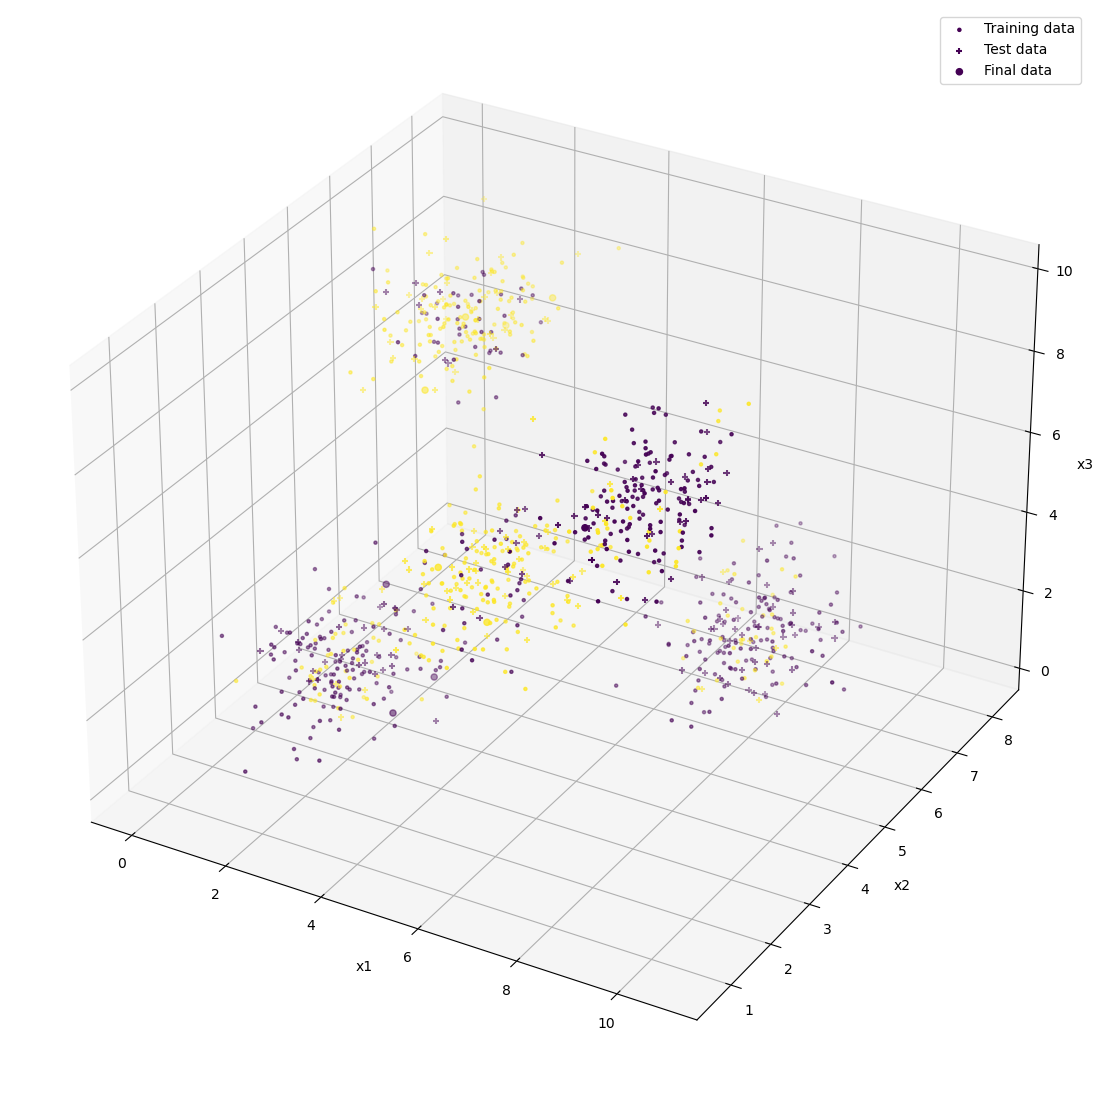

In [8]:
fig = plt.figure(figsize=(14,14))
ax = fig.add_subplot(projection='3d')
ax.scatter(X_train['x1'], X_train['x2'], X_train['x3'], c=y_train, marker='.', label='Training data')
ax.scatter(X_test['x1'], X_test['x2'], X_test['x3'], c=y_test, marker='+', label='Test data')
ax.scatter(X_final['x1'], X_final['x2'], X_final['x3'], c=y_final, marker='o', label='Final data')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3')
ax.legend()